# Gráficos interactivos

Alejandro E. Martínez Castro

_Departamento de Mecánica de Estructuras e Ingeniería Hidráulica. 
Universidad de Granada_

Basado en el cuaderno de Juan Luis Cano
https://github.com/CAChemE/curso-python-cientifico

# Uso de widgets interactivos de IPython

_Después de haber aprendido a utilizar las bibliotecas de Python científico claves (NumPy, matplotlib y SymPy), con los módulos interactivos de IPython / Jupyter podemos obtener resultados interactivas de muy alta calidad y altamente personalizables._

_La función `interactive` (IPython.html.widgets.interact) crea automáticamente y con un comando una interfaz gráfica de usuario (GUI) para la exploración de código y datos de forma interactiva. Es la forma más fácil de comenzar a utilizar los widgets de IPython._

_ Este notebook es una traducción parcial de un [tutorial de Jupyter dado por sus desarroladores](https://github.com/jupyter/strata-sv-2015-tutorial) durante la [Strata Silicon Valley 2015](http://strataconf.com/big-data-conference-ca-2015). Vamos a empezar por lo más sencillo._

En primer lugar, importamos los módulos que vamos a utilizar:

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
from ipywidgets import widgets

## Uso básico de `interact`

A nivel más básico, `interact` genera controles automáticamente mediante una interfaz gráfica de usuario para los argumentos de una función que debe ser definida previamente. Así, `interact` llama a dicha función con los argumentos que se definieron para manipularlos con controles de forma interactiva.

Por tanto, para utilizar `interact`, es necesario definir la función en Python que desea explorar. Vamos a crear es una función que imprime su único argumento x:

In [2]:
def f(x):
    print(x)


Ahora utilizaremos esta función como primer argumento para `interact` junto con un argumento predifinido a un entero (`x = 10`), se autogenera un control deslizante (slider) y con que nos permite interactuar con esta función.

In [3]:
interact(f, x=10);

Al mover el deslizador, se llama a la función y el valor actual de x se imprime.

Si hacemos pasar un `True` o `False`, `interact` generará una casilla de verificación:

In [5]:
interact(f, x=True);

Si hacemos pasar una cadena de texto (string), `interact` generará un campo de texto:

In [6]:
interact(f, x=u'¡Hola!');  

## Fijando argumentos usando `fixed`

Hay momentos en los que es posible que vayamos a explorar una función utilizando `interact`, pero queramos fijar una o más de sus argumentos a valores específicos. Esto puede lograrse haciendo uso la función `fixed`.

In [7]:
def h(p, q):
    print(p, q)

Cuando llamamos a `interact`, hacemos pasar `fixed(20)` para mantener `q` fijado al valor de 20.

In [9]:
interact(h, q=5, p=fixed(20));

Fijate que el deslizador solo responde a `p` y que el valor de `q` está fijado con el valor 20. 

## *Abreviaturas*

Cuando pasamos un entero como argumento (`x=10`) a `interact`, se genera un deslizador de valores enteros con el rango de $[-10,+3\times10]$. En este caso, `10` es una *abreviación* de un widget slider tipo:

```python
IntSlider(min=-10,max=30,step=1,value=10)
```

De hecho, podemos obtener el mismo resultado si pasamos este `IntSliderWidget` como el argumento de palabra clave para `x`:

In [8]:
interact(f, x=widgets.IntSlider(min=-10,max=30,step=1,value=10));

10


Este ejemplo aclara como interactuar con con procesos mediante sus argumentos clave:

1. Si el argumento clave es `Widget` con un atributo tipo `value`, se utiliza el widget tipo slider. Cualquier widget con un atributo que resulte en un valor numérico se puede utilizar, incluso los personalizados.
2. De lo contrario, el valor se trata como una *widget abbreviation* que se convierte en un widget antes de su uso.

La siguiente tabla ofrece una visión general de los diferentes *widget abbreviation*:


<table class="table table-condensed table-bordered">
  <tr><td><strong>Keyword argument</strong></td><td><strong>Widget</strong></td></tr>  
  <tr><td>`True` or `False`</td><td>CheckboxWidget</td></tr>  
  <tr><td>`'Hola'`</td><td>TextareaWidget</td></tr>
  <tr><td>`value` or `(min,max)` or `(min,max,step)` if integers are passed</td><td>IntSliderWidget</td></tr>
  <tr><td>`value` or `(min,max)` or `(min,max,step)` if floats are passed</td><td>FloatSliderWidget</td></tr>
  <tr><td>`('naranja','manzana')` or `{'uno':1,'dos':2}`</td><td>Dropdown</td></tr>
</table>

Hemos visto arriba cómo funcionan los widgets checkbox y de área de texto. Veamos, más detalles sobre las diferentes abreviaturas para deslizadores y menús desplegables.

Si se pasa un tupla con dos enteros `(min, max)` un deslizador con valores también enteros se crea utilizando los mismos como máximo y mínimo. En este caso, se utiliza el tamaño de paso predeterminado de `1`.

In [9]:
interact(f, x=(0,4));

2


Si se pasa un tupla con tres enteros `(min,max,step)`, lo que hacemos es determinar también el tamaño de paso:

In [10]:
interact(f, x=(0,8,2));

4


Para que el widget devuelva valores en coma flotante, debemos pasar una tupla con valores en coma flotante. En el siguiente ejemplo, el mínimo es  `0.0`, el máximo es `10.0` y el intervalo es de `0.1` (por defecto).

In [11]:
interact(f, x=(0.0,10.0));

5.0


De  nuevo, el  tamaño del intervalo se puede determinar haciendo uso de un tercer elemento en la tupla:

In [12]:
interact(f, x=(0.0,10.0,0.01));

4.99



Para ambos sliders de enteros  y flotantes, se puede escoger el valor inicial del widget pasando un argumento de palabra clave por defecto a la función Python subyacente. Aquí establecemos el valor inicial de un slider con valores en coma flotante a `5.5`.

In [13]:
def h(x=5.5):
    print(x)
    
interact(h, x=(0.0,20.0,0.5));

5.5


También podemos crear menús desplegables haciendo pasar una tupla de cadenas de texto (*strings*). En este caso, las cadenas de texto son utilizados como los nombres de la interfaz de usuario del menú desplegable y pasan a la función Python subyacente.

In [14]:
interact(f, x=('manzanas','naranjas'));

manzanas


Si quieres un menú desplegable que pasa valores que no son cadenas de texto a la función de Python, se puede pasar un diccionario. Las palabras claves del diccionario se utilizan para los nombres de la interfaz de usuario del menú desplegable y los valores son los argumentos que se pasan a la función Python subyacente. Se puede entender mejor viendo este ejemplo:

In [15]:
interact(f, x={'uno': 10, 'dos': 20});

20


# Widgets  interactivos y Matplotlib

Como ya sabes, el paquete [Matplotlib](http://matplotlib.org/) permite generar gráficos. Veamos cómo podemos combinar los widgets interactivos con esta bibliote gráfica.

### Repaso: creando un gráfico

A modo de repaso, veamos cómo creabamos un gráfico simple. Primero debemos de cargar las bibliotecas:

In [10]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

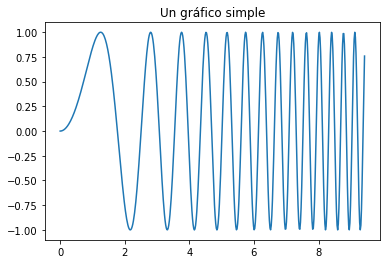

In [11]:
# Creamos un array con valores de x
x = np.linspace(0, 3*np.pi, 500)
y = np.sin(x**2)

plt.plot(x, y)
plt.title(u'Un gráfico simple');

### Haciendo un gráfico interactivo

En el siguiente ejemplo, una función que representa gráficamente la suma de dos ondas sinusoidales la combinamos con `interact`.

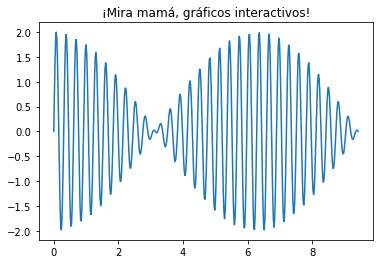

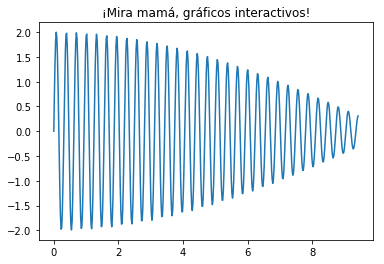

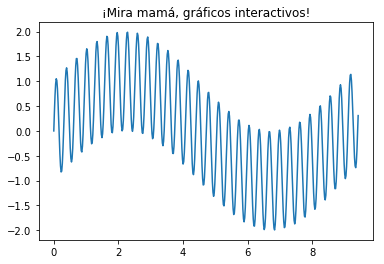

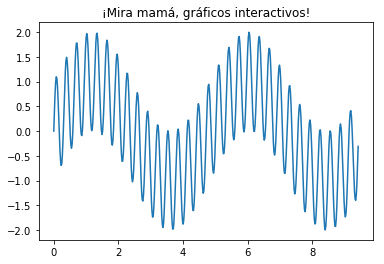

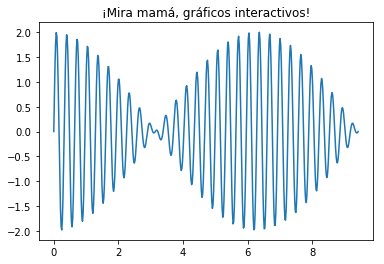

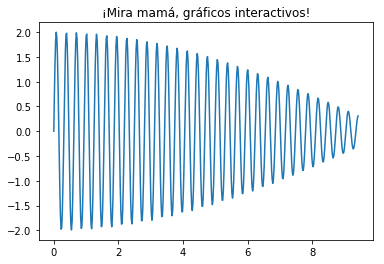

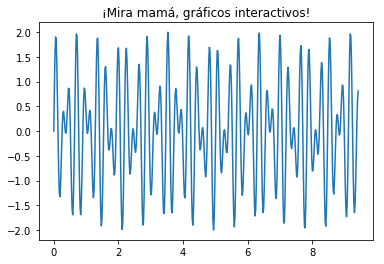

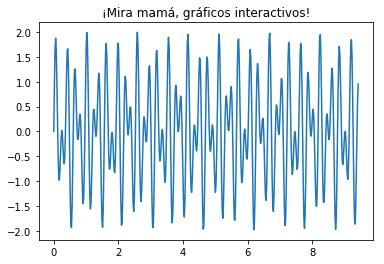

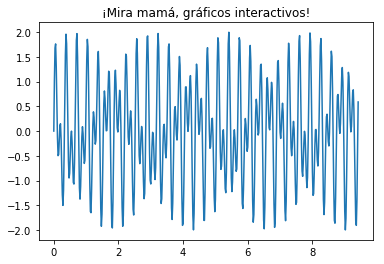

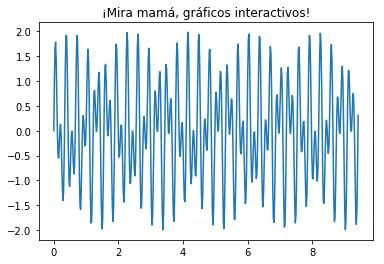

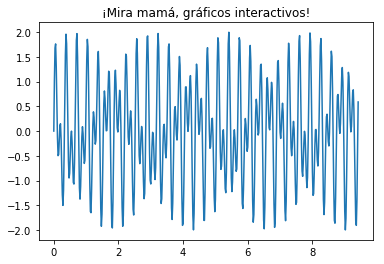

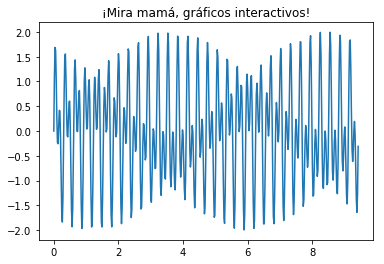

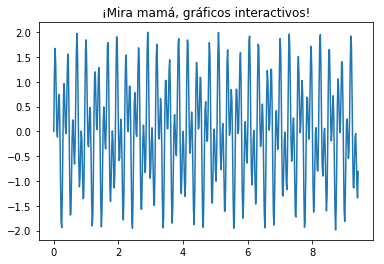

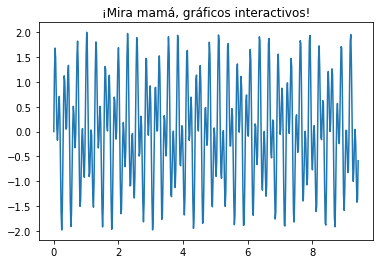

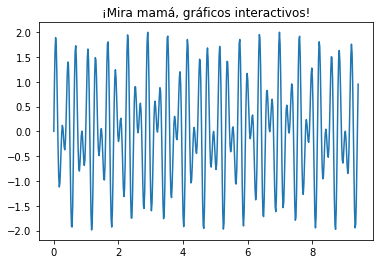

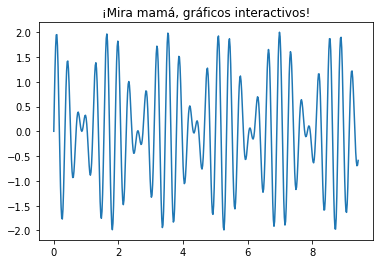

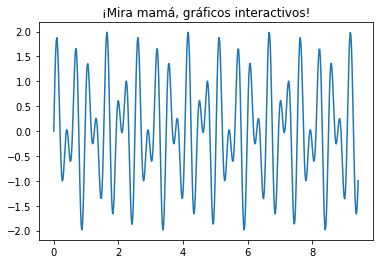

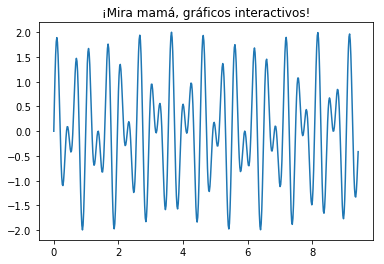

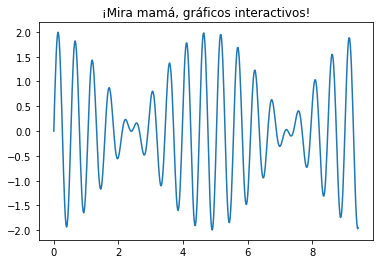

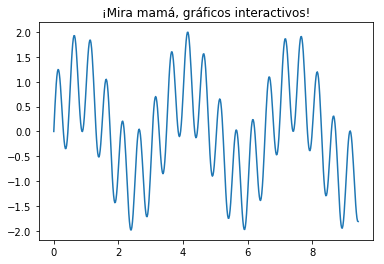

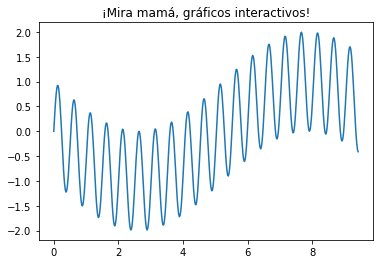

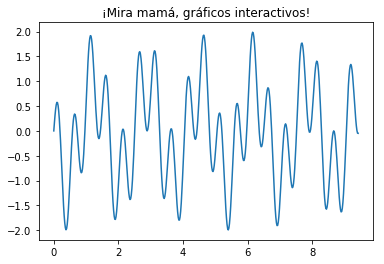

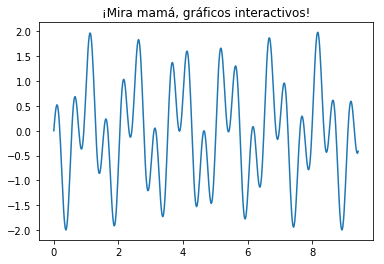

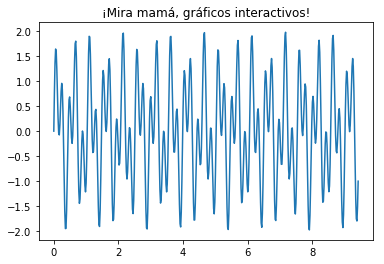

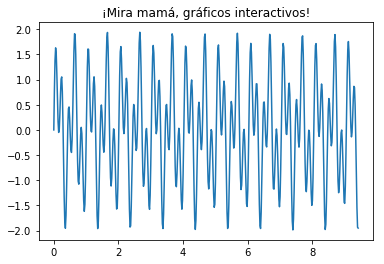

In [13]:
def dibuja_ondas(frecuencia1, frecuencia2):
    x = np.linspace(0, 3*np.pi, 500)
    y = np.sin(x*frecuencia1) + np.sin(x*frecuencia2)
    plt.plot(x,y)
    
    plt.title(u'¡Mira mamá, gráficos interactivos!')
    
interact( dibuja_ondas, frecuencia1=20., frecuencia2=21.);